   student_id program_interest demographic_info  high_school_gpa  \
0         101      Engineering            Urban              3.8   
1         102             Arts            Rural              2.9   
2         103          Science            Urban              3.5   
3         104      Engineering            Urban              3.2   
4         105          Science            Rural              3.0   

   entrance_exam_score  financial_aid  enrollment_status  
0                   85              1                  1  
1                   78              0                  0  
2                   92              1                  1  
3                   88              0                  1  
4                   76              1                  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           5 non-null 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

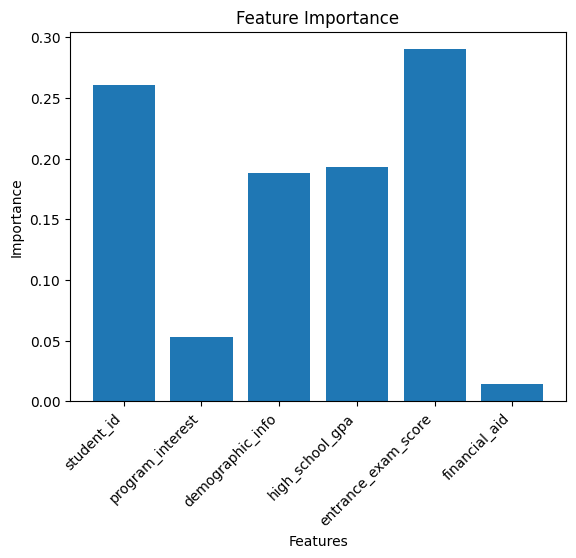

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv('/content/student_data.csv')

print(data.head())
print(data.info())

numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

label_encoder = LabelEncoder()
for col in ['program_interest', 'demographic_info']:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop(columns=['enrollment_status'])
y = data['enrollment_status']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
importance = model.feature_importances_
features = data.columns[:-1]
plt.bar(features, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha="right")
plt.show()

data.drop(columns=['student_id', 'personal_info'], inplace=True, errors='ignore')